In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns' ,100)

In [50]:
df = pd.read_excel('SuperStoreData.xls',parse_dates=['Order Date','Ship Date'])

In [80]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month_Year       0
dtype: int64

# Period - Monthly

In [51]:
df['Month_Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [54]:
df[['Month_Year','Order Date','Sales']]

,Month_Year,Order Date,Sales
0,2016-11,2016-11-08,261.9600
1,2016-11,2016-11-08,731.9400
2,2016-06,2016-06-12,14.6200
3,2015-10,2015-10-11,957.5775
4,2015-10,2015-10-11,22.3680
...,...,...,...
9989,2014-01,2014-01-21,25.2480
9990,2017-02,2017-02-26,91.9600
9991,2017-02,2017-02-26,258.5760
9992,2017-02,2017-02-26,29.6000


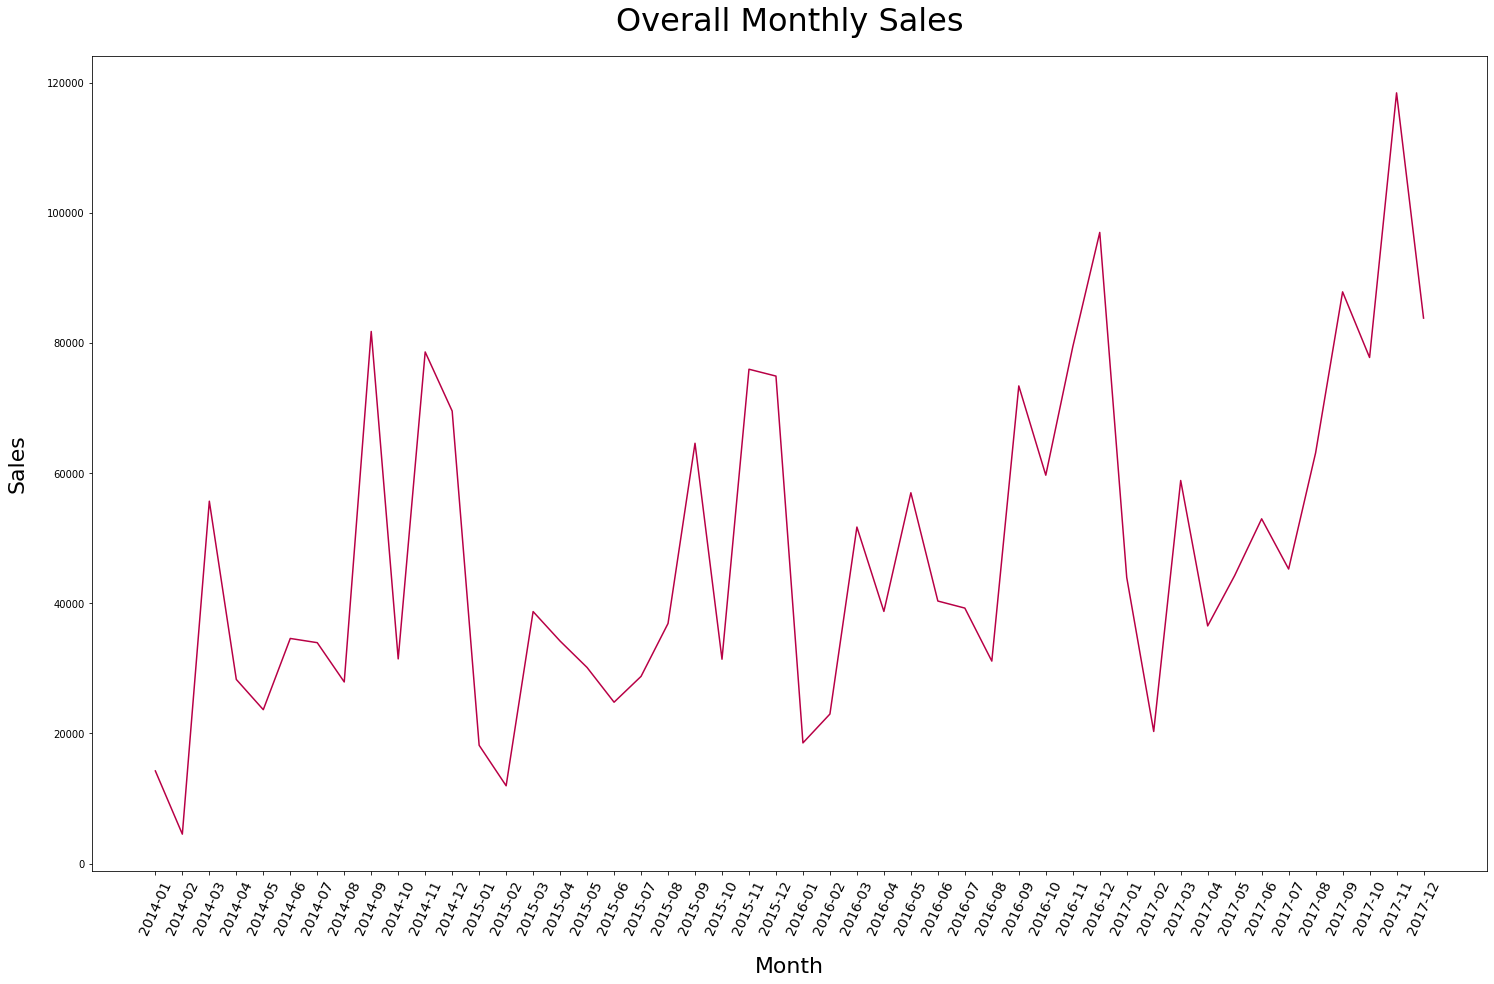

In [75]:
df_monthly_sales = df.groupby('Month_Year').sum()
months = [month for month, df in df_monthly_sales.groupby('Month_Year')]
plt.figure(figsize=(25,15))
plt.plot(months,df_monthly_sales['Sales'], color = '#b80045')
plt.xticks(months, rotation=65, size = 14)
plt.ylabel('Sales',size=22 , labelpad=20)
plt.xlabel('Month',size=22, labelpad=20)
plt.title('Overall Monthly Sales',size=32, pad=25)
plt.show()

# Period - Daily

In [62]:

df_daily_sales = df.groupby('Order Date').Sales.sum().reset_index()

In [63]:
df_daily_sales = df_daily_sales.sort_values('Order Date',ascending=True)

In [64]:
df_daily_sales

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


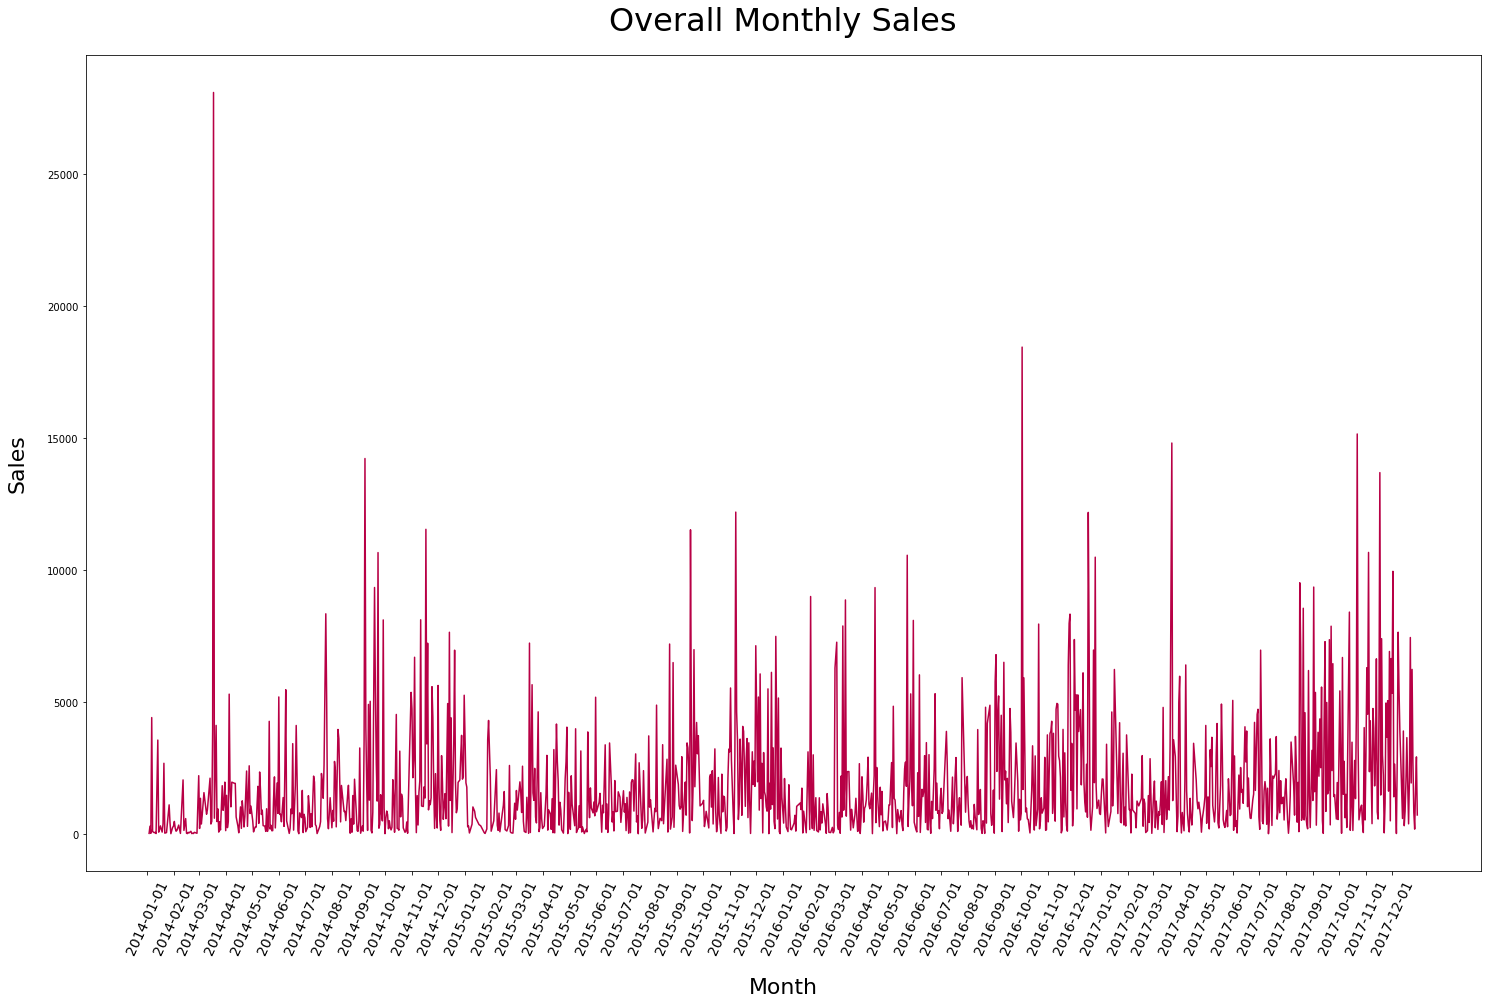

In [77]:
days = [month for month, df in df_daily_sales.groupby('Order Date')]
plt.figure(figsize=(25,15))
plt.plot(days,df_daily_sales['Sales'], color = '#b80045')
plt.xticks(months, rotation=65, size = 14)
plt.ylabel('Sales',size=22 , labelpad=20)
plt.xlabel('Month',size=22, labelpad=20)
plt.title('Overall Monthly Sales',size=32, pad=25)
plt.show()